    id - Unique ID for each home sold
    date - Date of the home sale    
    price - Price of each home sold
    bedrooms - Number of bedrooms
    bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
    sqft_living - Square footage of the apartments interior living space
    sqft_lot - Square footage of the land space
    floors - Number of floors
    waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
    view - An index from 0 to 4 of how good the view of the property was
    condition - An index from 1 to 5 on the condition of the apartment,
    grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
    sqft_above - The square footage of the interior housing space that is above ground level
    sqft_basement - The square footage of the interior housing space that is below ground level
    yr_built - The year the house was initially built
    yr_renovated - The year of the house’s last renovation
    zipcode - What zipcode area the house is in
    lat - Lattitude
    long - Longitude
    sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
    sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [270]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pypyodbc as odbc
import squarify
import pyodbc
import requests
import statsmodels.api as sm
from io import StringIO
from sklearn.linear_model import LinearRegression
print('Completed import lib')

Completed import lib


In [271]:
# Với file raw từ github cần thao tác như sau
url = 'https://raw.githubusercontent.com/DK-Hieu/House_price_prediction/main/ver_4_kc_house/kc_house_data.csv'
req = requests.get(url)
data = StringIO(req.text)
p_house = pd.read_csv(data)

columns_drop = ['id','date','zipcode','lat','long']
p_house.drop(columns=columns_drop,inplace=True)

In [272]:
conditions = [(p_house['yr_renovated'] != 0), (p_house['yr_renovated'] == 0)]
# create a list of the values we want to assign for each condition
values = [1,0]
# create a new column and use np.select to assign values to it using our lists as arguments
p_house['renovated_or_not'] = np.select(conditions, values)
p_house

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,renovated_or_not
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287,0


In [273]:
p_house.isnull().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
sqft_living15       0
sqft_lot15          0
renovated_or_not    0
dtype: int64

In [274]:
p_house.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0,321950.00,450000.00,645000.0,7700000.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
sqft_lot,21613.0,15106.967566,41420.511515,520.0,5040.00,7618.00,10688.0,1651359.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.50,2.0,3.5
waterfront,21613.0,0.007542,0.086517,0.0,0.00,0.00,0.0,1.0
view,21613.0,0.234303,0.766318,0.0,0.00,0.00,0.0,4.0
condition,21613.0,3.409430,0.650743,1.0,3.00,3.00,4.0,5.0
grade,21613.0,7.656873,1.175459,1.0,7.00,7.00,8.0,13.0


In [275]:
p_house.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,renovated_or_not
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.585379,0.082447,0.126092
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,0.391638,0.029244,0.018553
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.568634,0.087175,0.050260
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.756420,0.183286,0.055094
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,0.144608,0.718557,0.007745
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.279885,-0.011269,0.006260
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.086463,0.030703,0.093294
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.280439,0.072575,0.104062
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.092824,-0.003406,-0.060139
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.713202,0.119248,0.014008


<AxesSubplot:>

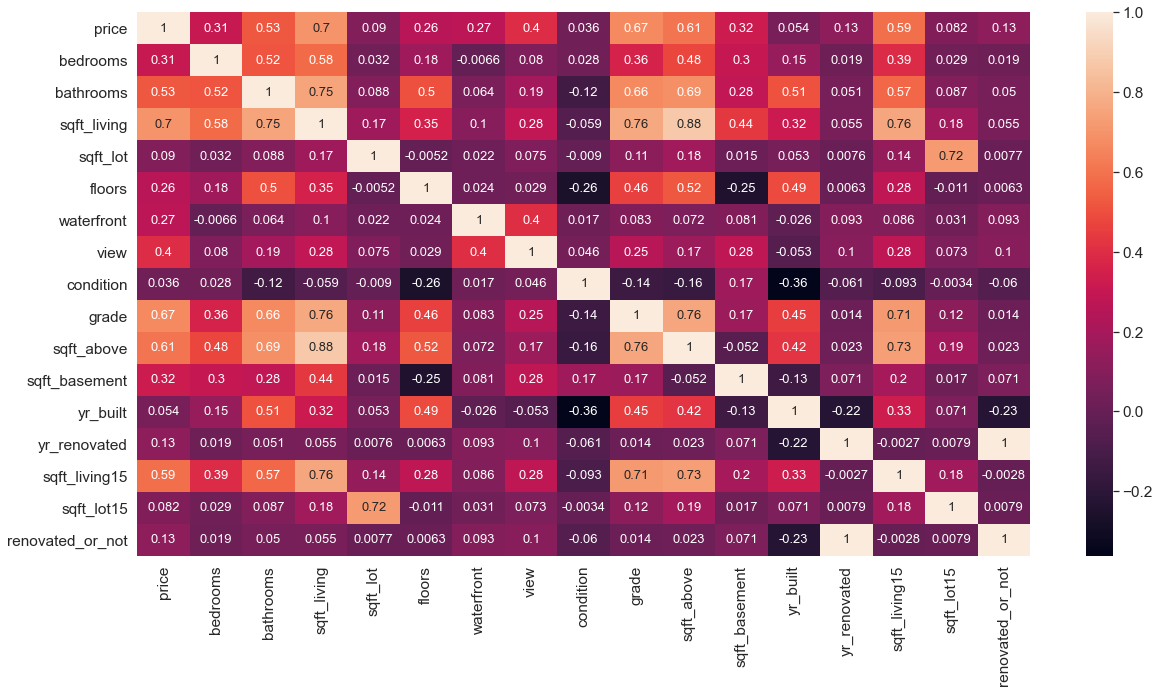

In [276]:
fig, ax = plt.subplots(figsize=(20,10))

sns.set_style(style='white')
sns.set(font_scale=1.4)
sns.heatmap(p_house.corr(), annot=True, annot_kws={"size": 13},)

### Price

C:\Users\dk201\anaconda3\envs\vscode2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sales')

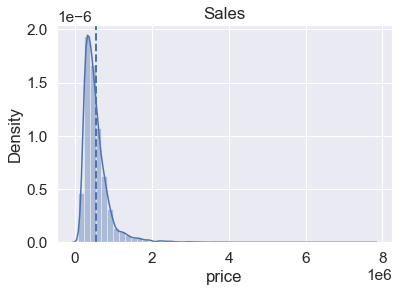

In [277]:
sns.distplot(p_house['price'])
plt.axvline(x=p_house['price'].mean(), linestyle='--', linewidth=2)
plt.xlim()
plt.title('Sales')

C:\Users\dk201\anaconda3\envs\vscode2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


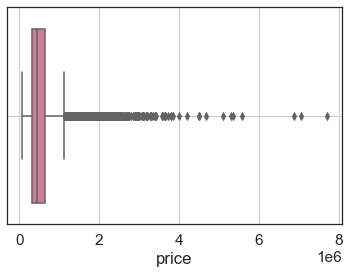

In [278]:
sns.set_style(style='white')
sns.boxplot(p_house['price'], color= 'palevioletred', orient='h')
plt.grid(True)
#plt.xlim(-3,6)
plt.xlabel('price')
plt.show()

In [279]:
def remove_outliers(data, x):
    q25 = np.percentile(data[x], 25)
    q75 = np.percentile(data[x], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower = q25 - cut_off
    upper = q75 + cut_off
    data = data[(data[x] < upper) & (data[x] > lower)]
    print(f"Outliers of {x} are removed\n")
    return data

p_house = remove_outliers(p_house, 'price')

Outliers of price are removed



In [280]:
p_house.describe().T

,count,mean,std,min,25%,50%,75%,max
price,20467.0,476984.559437,208371.261670,75000.0,315000.0,437500.0,600000.0,1127500.0
bedrooms,20467.0,3.329750,0.912885,0.0,3.0,3.0,4.0,33.0
bathrooms,20467.0,2.051632,0.711906,0.0,1.5,2.0,2.5,7.5
sqft_living,20467.0,1975.558167,774.833460,290.0,1400.0,1860.0,2431.0,7480.0
sqft_lot,20467.0,14610.408169,40109.556813,520.0,5000.0,7500.0,10319.0,1651359.0
floors,20467.0,1.476035,0.537033,1.0,1.0,1.0,2.0,3.5
waterfront,20467.0,0.002980,0.054513,0.0,0.0,0.0,0.0,1.0
view,20467.0,0.172668,0.640950,0.0,0.0,0.0,0.0,4.0
condition,20467.0,3.406361,0.647228,1.0,3.0,3.0,4.0,5.0
grade,20467.0,7.530561,1.039192,1.0,7.0,7.0,8.0,12.0


C:\Users\dk201\anaconda3\envs\vscode2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dk201\anaconda3\envs\vscode2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


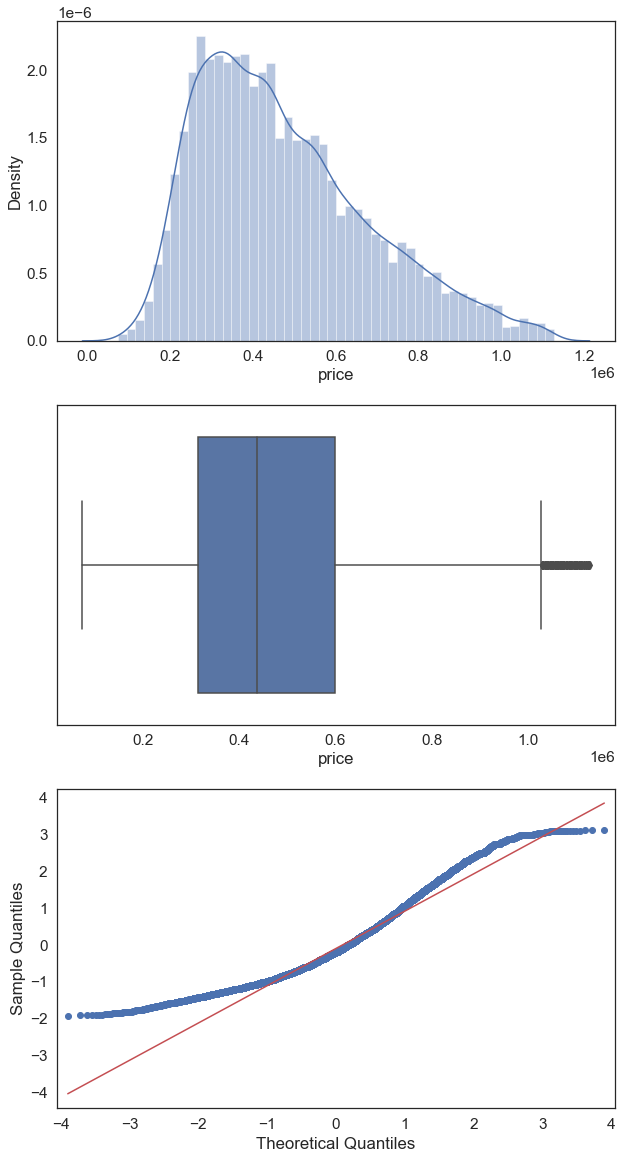

In [281]:
import matplotlib.gridspec as gridspec

#gridkw = dict(height_ratios=[])
#fig, (ax1, ax2,ax3) = plt.subplots(nrows=1, ncols=3, gridspec_kw=gridkw)
fig, ((ax1), (ax2),(ax3)) = plt.subplots(nrows=3, ncols=1, figsize=(10,20))


#ax1 = fig.add_subplot(grid[0, :])
sns.distplot(p_house['price'], ax=ax1)

#ax2 = fig.add_subplot(grid[1, :])
sns.boxplot(p_house['price'], orient='h',ax=ax2)

#ax3 = fig.add_subplot(grid[2, :])
sm.qqplot(p_house['price'], fit=True,line='q',ax=ax3)

plt.show()

### bedrooms

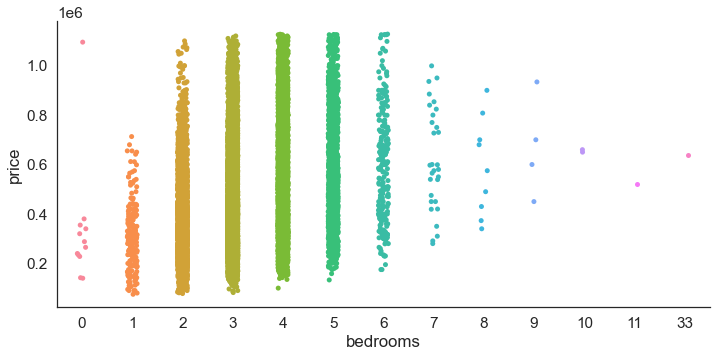

In [282]:
sns.catplot(x='bedrooms', y='price', data=p_house, height=5, aspect=2)

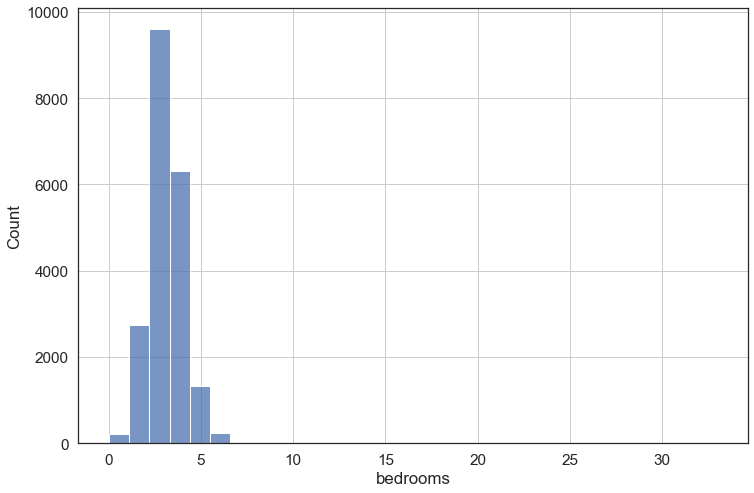

In [283]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(p_house.bedrooms, bins=30)

plt.grid(True)

Outline là các điểm > 8, loại bỏ những điểm outline

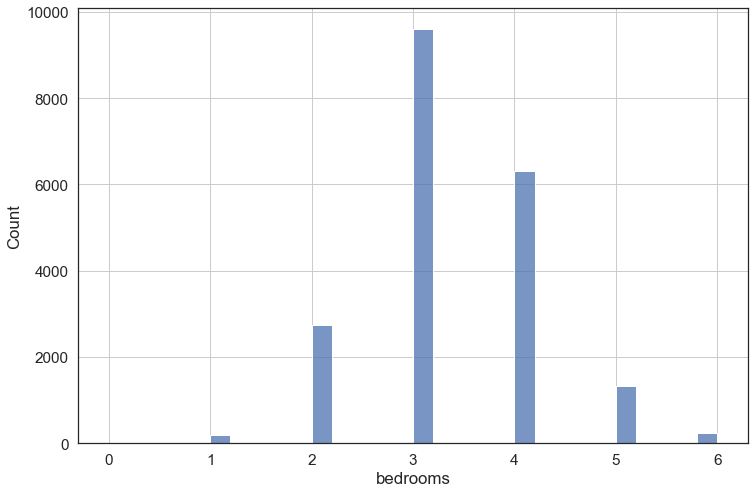

In [284]:
p_house = p_house[p_house['bedrooms'] < 7]

fig = plt.figure(figsize=(12, 8))
sns.histplot(p_house.bedrooms, bins=30)

plt.grid(True)

In [285]:
p_house.shape

(20420, 17)

### bathroom

C:\Users\dk201\anaconda3\envs\vscode2\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


<Figure size 3600x2880 with 0 Axes>

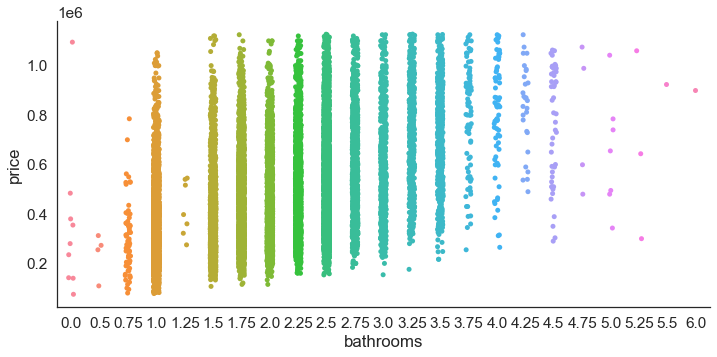

In [286]:
ax = plt.figure(figsize=(50, 40))
sns.catplot(x='bathrooms', y='price', data=p_house, height=5, aspect=2, ax=ax)

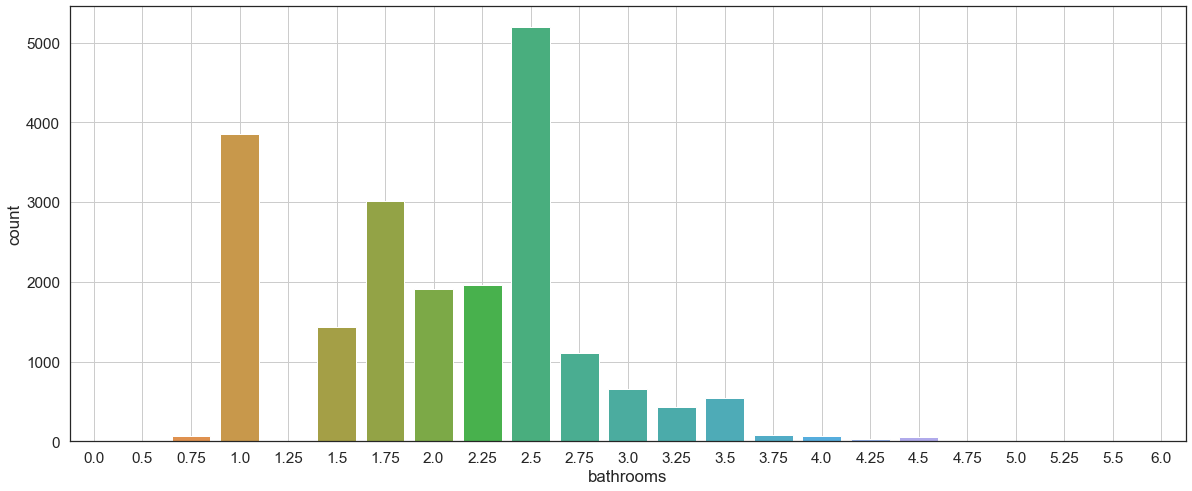

In [287]:
fig = plt.figure(figsize=(20, 8))
sns.countplot(x=p_house['bathrooms'])

plt.grid()

Loại bỏ outline với 0.5 < giá trị < 4.75 và loại bỏ giá trị 1.25

In [288]:
p_house[p_house.bathrooms == 1.25]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,renovated_or_not
972,397500.0,3,1.25,1510,13737,1.0,0,3,4,6,810,700,1961,0,2560,10202,0
1678,275000.0,3,1.25,1230,4500,1.5,0,0,4,7,1230,0,1913,0,1310,5000,0
3732,360000.0,3,1.25,2350,6200,1.0,0,0,4,7,1320,1030,1966,0,2140,9543,0
16840,540000.0,2,1.25,1230,1569,2.0,0,0,3,9,1050,180,2009,0,1100,1230,0
20701,545000.0,2,1.25,1240,2150,2.0,0,0,3,8,1240,0,2014,0,1340,5289,0
21065,321950.0,2,1.25,860,1277,2.0,0,0,3,7,860,0,2007,0,1280,1265,0
21552,516500.0,1,1.25,1100,638,3.0,0,0,3,9,1100,0,2014,0,1110,1933,0


In [289]:
p_house = p_house.loc[(p_house['bathrooms']>0.75)&(p_house['bathrooms']<4.75)]
p_house = p_house.drop(p_house[p_house.bathrooms == 1.25].index)


C:\Users\dk201\anaconda3\envs\vscode2\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


<Figure size 3600x2880 with 0 Axes>

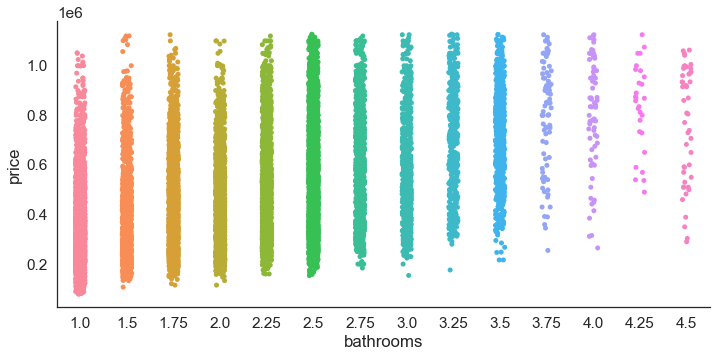

In [290]:
ax = plt.figure(figsize=(50, 40))
sns.catplot(x='bathrooms', y='price', data=p_house, height=5, aspect=2, ax=ax)

In [291]:
p_house.shape

(20312, 17)

### Square footage

In [292]:
sqft_cols = p_house.columns[p_house.columns.str.contains('sqft')]
sqft_cols

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

C:\Users\dk201\anaconda3\envs\vscode2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dk201\anaconda3\envs\vscode2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dk201\anaconda3\envs\vscode2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

<AxesSubplot:xlabel='sqft_lot15', ylabel='Density'>

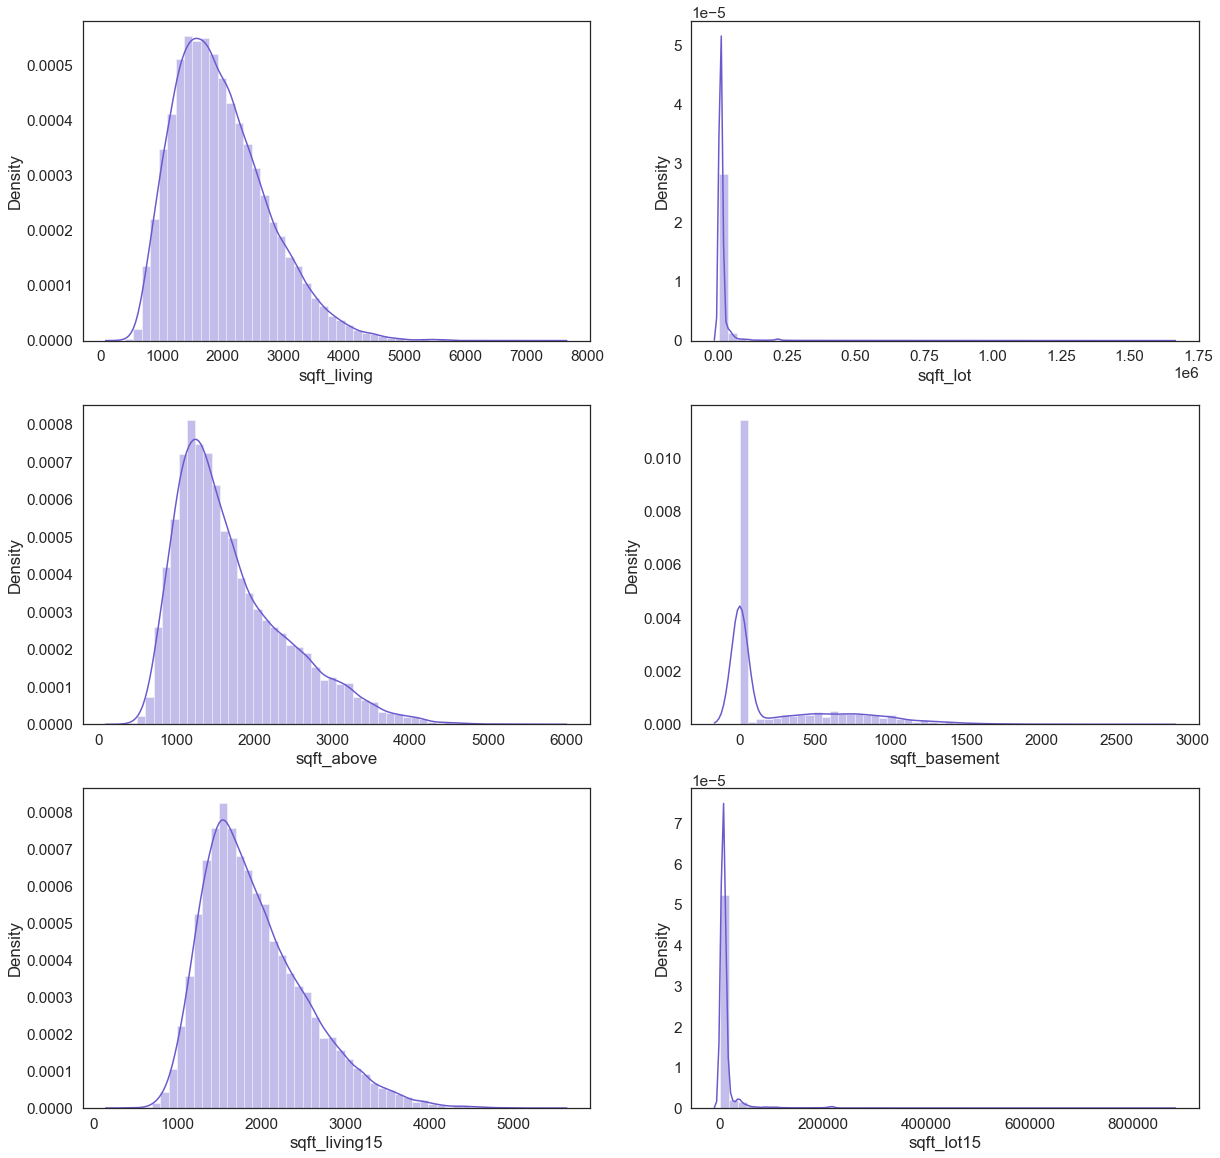

In [293]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(20,20))

sns.distplot(p_house['sqft_living'],color='slateblue', ax=ax1)
sns.distplot(p_house['sqft_lot'],color='slateblue', ax=ax2)
sns.distplot(p_house['sqft_above'],color='slateblue', ax=ax3)
sns.distplot(p_house['sqft_basement'],color='slateblue', ax=ax4)
sns.distplot(p_house['sqft_living15'],color='slateblue', ax=ax5)
sns.distplot(p_house['sqft_lot15'],color='slateblue', ax=ax6)


Floors

C:\Users\dk201\anaconda3\envs\vscode2\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


<Figure size 3600x2880 with 0 Axes>

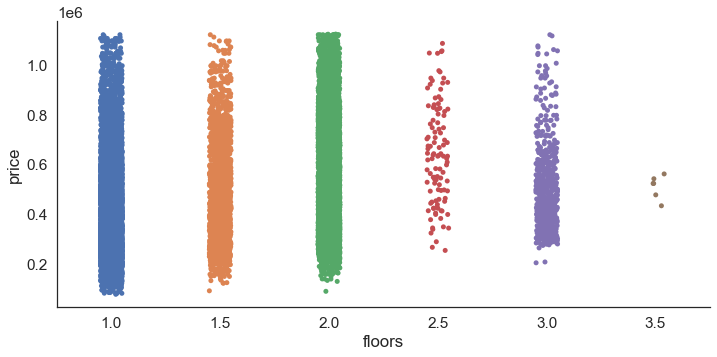

In [294]:
ax = plt.figure(figsize=(50, 40))
sns.catplot(x='floors', y='price', data=p_house, height=5, aspect=2, ax=ax)

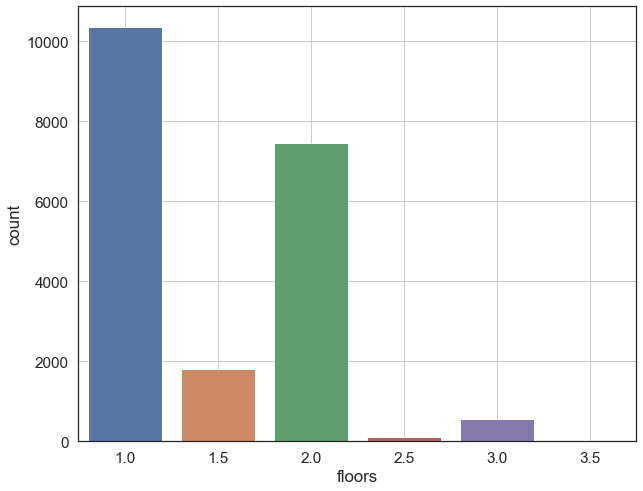

In [295]:
fig = plt.figure(figsize=(10, 8))
sns.countplot(x=p_house.floors)

plt.grid()

Lại bỏ các giá trị >= 3.5

In [296]:
p_house = p_house[p_house.floors < 3.5]
p_house

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,renovated_or_not
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21606,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,2050,6200,0
21607,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,1330,1265,0
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,0


C:\Users\dk201\anaconda3\envs\vscode2\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


<Figure size 3600x2880 with 0 Axes>

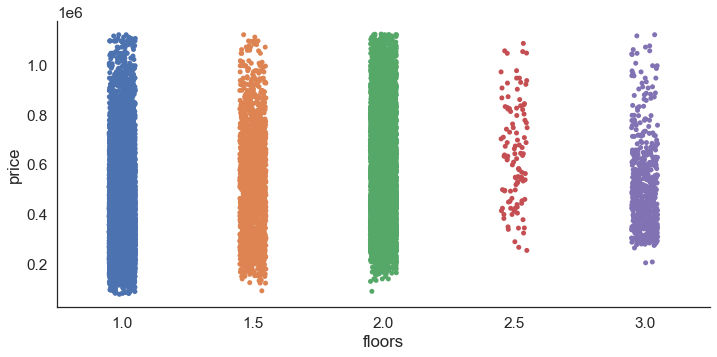

In [297]:
ax = plt.figure(figsize=(50, 40))
sns.catplot(x='floors', y='price', data=p_house, height=5, aspect=2, ax=ax)

### Waterfront

C:\Users\dk201\anaconda3\envs\vscode2\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


<Figure size 720x1440 with 0 Axes>

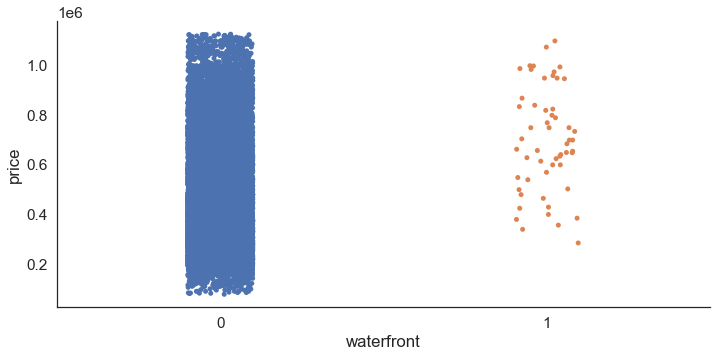

In [298]:
ax = plt.figure(figsize=(10, 20))
sns.catplot(x='waterfront', y='price', data=p_house, height=5, aspect=2, ax=ax)

### View

C:\Users\dk201\anaconda3\envs\vscode2\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


<Figure size 720x1440 with 0 Axes>

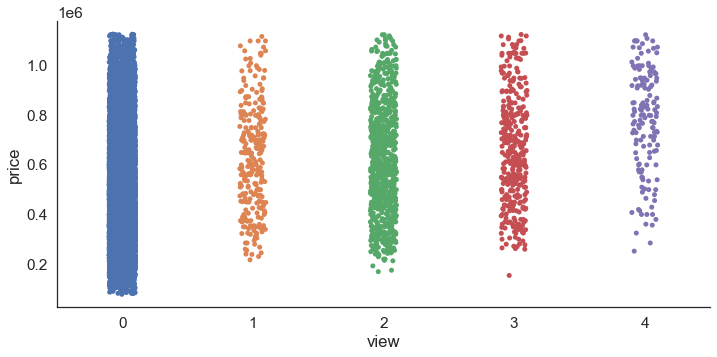

In [299]:
ax = plt.figure(figsize=(10, 20))
sns.catplot(x='view', y='price', data=p_house, height=5, aspect=2, ax=ax)

### Condition

In [300]:
p_house

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,renovated_or_not
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21606,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,2050,6200,0
21607,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,1330,1265,0
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,0


C:\Users\dk201\anaconda3\envs\vscode2\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


<Figure size 720x1440 with 0 Axes>

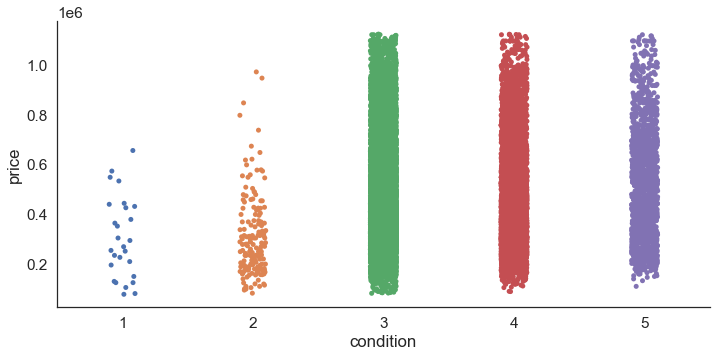

In [301]:
ax = plt.figure(figsize=(10, 20))
sns.catplot(x='condition', y='price', data=p_house, height=5, aspect=2, ax=ax)

### Grade

C:\Users\dk201\anaconda3\envs\vscode2\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


<Figure size 720x1440 with 0 Axes>

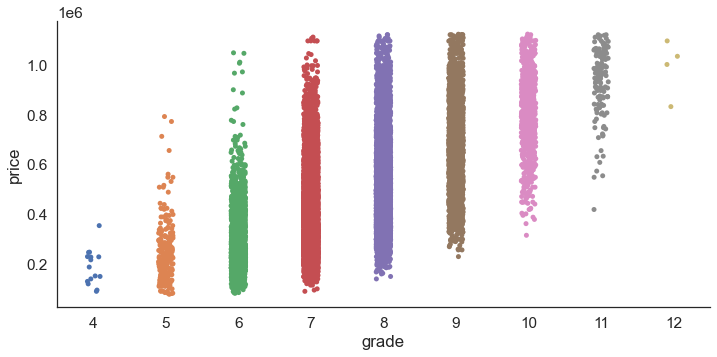

In [302]:
ax = plt.figure(figsize=(10, 20))
sns.catplot(x='grade', y='price', data=p_house, height=5, aspect=2, ax=ax)

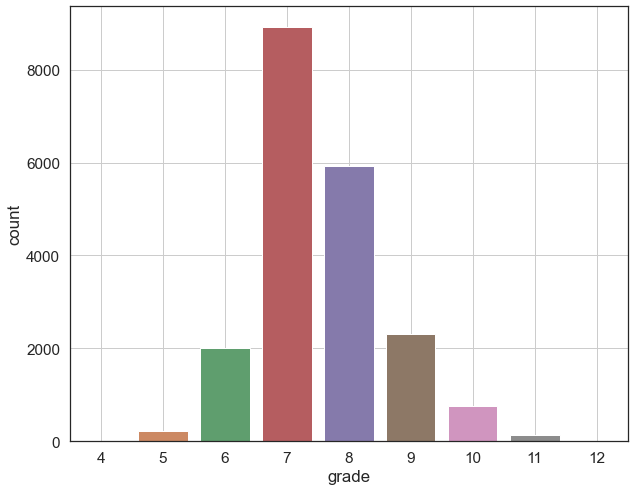

In [303]:
fig = plt.figure(figsize=(10, 8))
sns.countplot(x=p_house.grade)

plt.grid()

Loại bỏ outline 4 < grade < 12

In [304]:
p_house = p_house[(p_house['grade'] > 4) & (p_house['grade'] < 12)]
p_house


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,renovated_or_not
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21606,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,2050,6200,0
21607,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,1330,1265,0
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,0


C:\Users\dk201\anaconda3\envs\vscode2\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


<Figure size 720x1440 with 0 Axes>

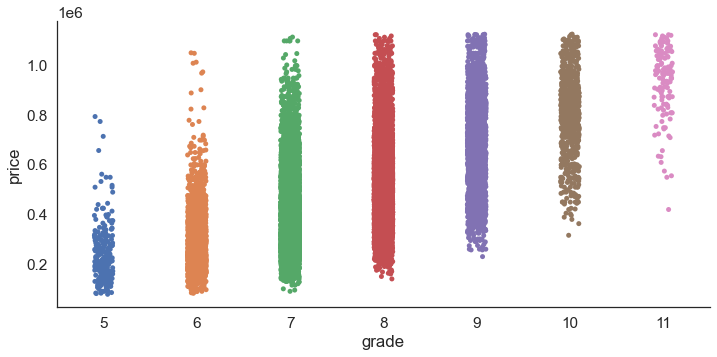

In [305]:
ax = plt.figure(figsize=(10, 20))
sns.catplot(x='grade', y='price', data=p_house, height=5, aspect=2, ax=ax)

### yr_built

In [306]:
#p_house['stye'] = pd.cut(p_house['yr_built'],4,labels=['oldest','old','new','newest'])
p_house['stye'] = pd.cut(p_house['yr_built'],4,labels=[0,1,2,3])

print(p_house['price'].corr(p_house['stye']))
p_house

0.04712536891590443


C:\Users\dk201\AppData\Local\Temp/ipykernel_8436/100305520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_house['stye'] = pd.cut(p_house['yr_built'],4,labels=[0,1,2,3])


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,renovated_or_not,stye
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,0,1
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,1,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,0,1
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,0,2
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21606,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,2050,6200,0,3
21607,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,1330,1265,0,3
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,0,3
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,0,3


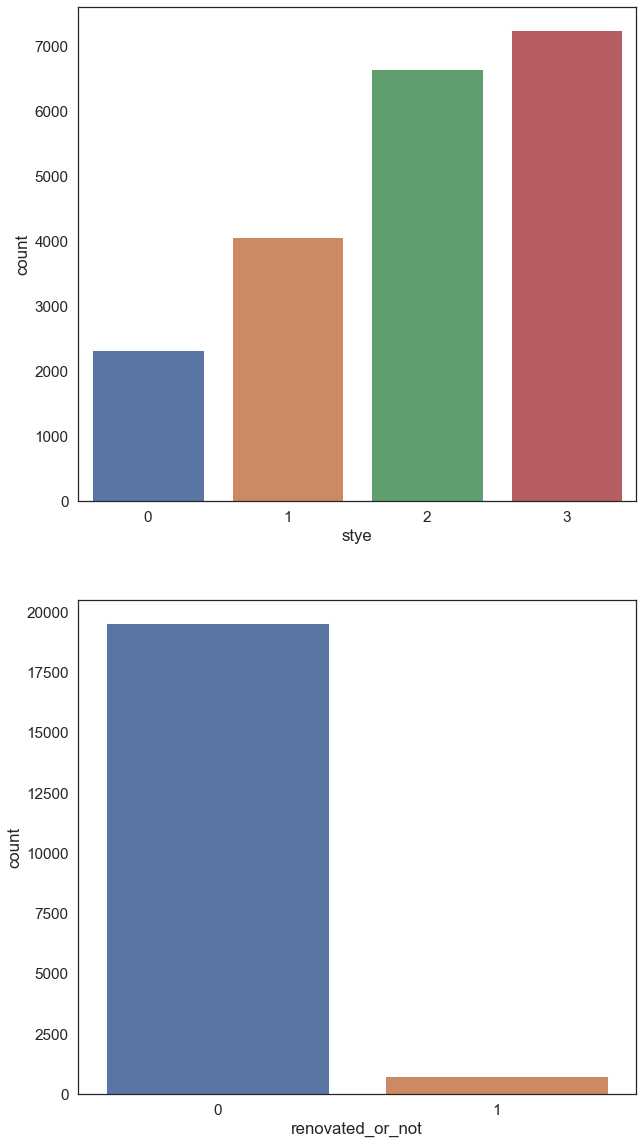

In [307]:
fig, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(10,20))

#sns.histplot(p_house.yr_old, kde=True,ax=ax1)
#sns.boxplot(p_house['yr_old'], color= 'palevioletred', orient='h',ax=ax2)
sns.countplot(x=p_house['stye'], ax=ax1)
sns.countplot(x=p_house['renovated_or_not'], ax=ax2)

#plt.legend()
plt.show()

In [308]:
p_house = p_house.drop(columns=['yr_built','yr_renovated'])
p_house

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,renovated_or_not,stye
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,0,1
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,1,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,0,1
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,0,2
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21606,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2050,6200,0,3
21607,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,1330,1265,0,3
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,1530,1509,0,3
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,1830,7200,0,3


### sqft_living15

C:\Users\dk201\anaconda3\envs\vscode2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dk201\anaconda3\envs\vscode2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

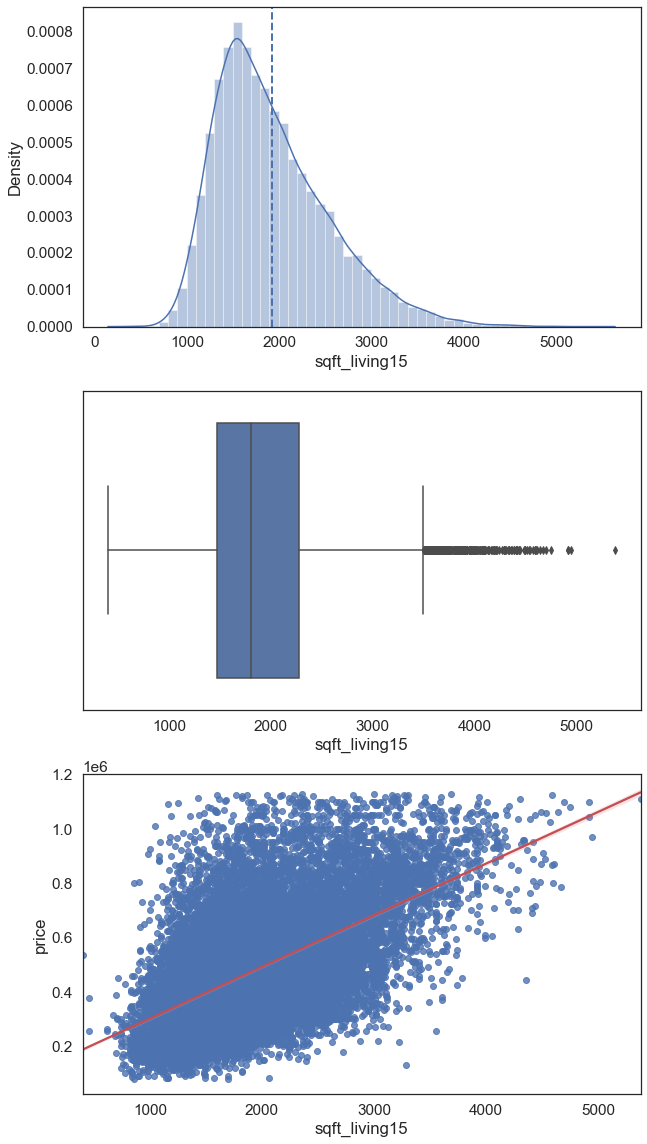

In [309]:
fig, ((ax1), (ax2),(ax3)) = plt.subplots(nrows=3, ncols=1, figsize=(10,20))

sns.distplot(p_house['sqft_living15'], ax=ax1)
ax1.axvline(x=p_house['sqft_living15'].mean(), linestyle='--', linewidth=2)

sns.boxplot(p_house['sqft_living15'], orient='h',ax=ax2)
sns.regplot(x='sqft_living15', y='price', data=p_house,line_kws={"color":"r"}, ax=ax3)

In [310]:
def remove_outliers(data, x):
    q25 = np.percentile(data[x], 25)
    q75 = np.percentile(data[x], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower = q25 - cut_off
    upper = q75 + cut_off
    data = data[(data[x] < upper) & (data[x] > lower)]
    print(f"Outliers of {x} are removed\n")
    return data

p_house = remove_outliers(p_house, 'sqft_living15')

Outliers of sqft_living15 are removed



C:\Users\dk201\anaconda3\envs\vscode2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dk201\anaconda3\envs\vscode2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

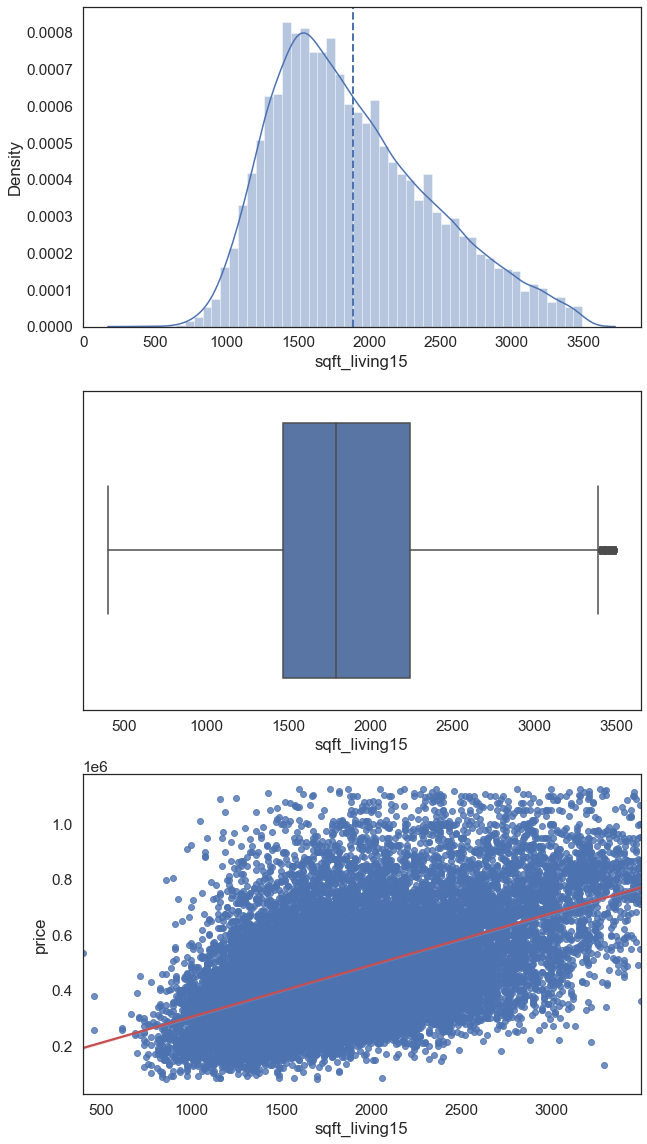

In [311]:
fig, ((ax1), (ax2),(ax3)) = plt.subplots(nrows=3, ncols=1, figsize=(10,20))

sns.distplot(p_house['sqft_living15'], ax=ax1)
ax1.axvline(x=p_house['sqft_living15'].mean(), linestyle='--', linewidth=2)

sns.boxplot(p_house['sqft_living15'], orient='h',ax=ax2)
sns.regplot(x='sqft_living15', y='price', data=p_house,line_kws={"color":"r"}, ax=ax3)

In [312]:
p_house.shape

(19908, 16)

### sqft_lot15

C:\Users\dk201\anaconda3\envs\vscode2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dk201\anaconda3\envs\vscode2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_lot15', ylabel='price'>

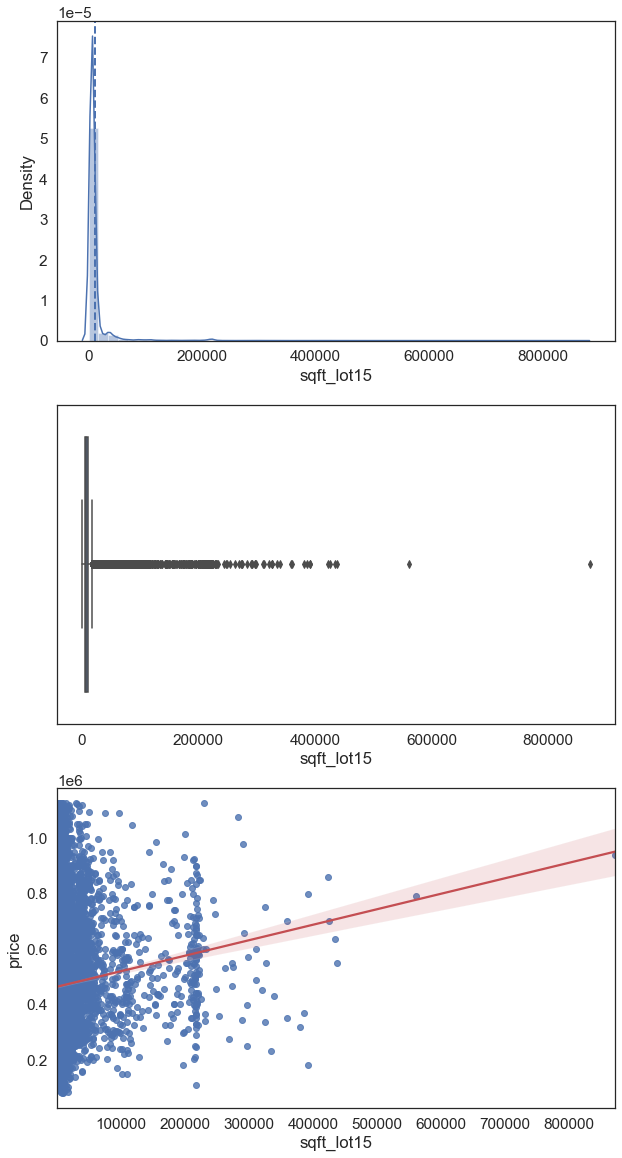

In [313]:
fig, ((ax1), (ax2),(ax3)) = plt.subplots(nrows=3, ncols=1, figsize=(10,20))

sns.distplot(p_house['sqft_lot15'], ax=ax1)
ax1.axvline(x=p_house['sqft_lot15'].mean(), linestyle='--', linewidth=2)

sns.boxplot(p_house['sqft_lot15'], orient='h',ax=ax2)
sns.regplot(x='sqft_lot15', y='price', data=p_house,line_kws={"color":"r"}, ax=ax3)
#sns.catplot(x='sqft_lot15', y='price', data=p_house, height=5, aspect=2, ax=ax3)

In [314]:
def remove_outliers(data, x):
    q25 = np.percentile(data[x], 25)
    q75 = np.percentile(data[x], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower = q25 - cut_off
    upper = q75 + cut_off
    data = data[(data[x] < upper) & (data[x] > lower)]
    print(f"Outliers of {x} are removed\n")
    return data

p_house = remove_outliers(p_house, 'sqft_lot15')

Outliers of sqft_lot15 are removed



C:\Users\dk201\anaconda3\envs\vscode2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dk201\anaconda3\envs\vscode2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_lot15', ylabel='price'>

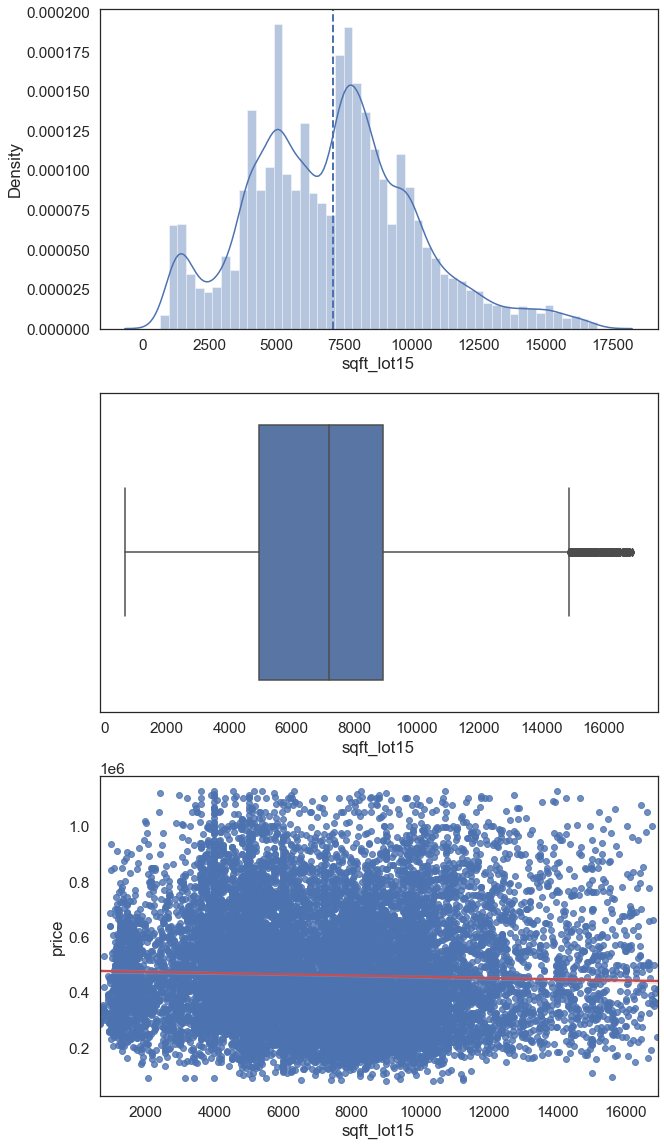

In [315]:
fig, ((ax1), (ax2),(ax3)) = plt.subplots(nrows=3, ncols=1, figsize=(10,20))

sns.distplot(p_house['sqft_lot15'], ax=ax1)
ax1.axvline(x=p_house['sqft_lot15'].mean(), linestyle='--', linewidth=2)

sns.boxplot(p_house['sqft_lot15'], orient='h',ax=ax2)
sns.regplot(x='sqft_lot15', y='price', data=p_house,line_kws={"color":"r"}, ax=ax3)
#sns.catplot(x='sqft_lot15', y='price', data=p_house, height=5, aspect=2, ax=ax3)

In [316]:
p_house.shape

(18095, 16)

### Chuẩn bị data train và test

In [329]:
p_house.to_excel('House_data.xlsx')
p_house.to_csv('House_data.csv')